In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [102]:
df = pd.read_csv('../data/kc_house_data.csv')

In [103]:
df.drop(columns='id', inplace=True)
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [104]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


EDA

In [105]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [107]:
df['date']= pd.to_datetime(df['date'])

In [108]:
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','yr_built', 'sqft_above', 'sqft_basement', 
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'condition', 'grade',  'view' ]

categoric_columns = [ 'date', 'waterfront',  'yr_renovated','zipcode']


In [109]:
#Removing outliers
quartile_sqft_living = df['sqft_living'].quantile(0.975)
quartile_sqft_lot15 = df['sqft_lot15'].quantile(0.975)
quartile_sqft_lot = df['sqft_lot'].quantile(0.97)
quartile_price = df['price'].quantile(0.98)

print(df.shape)
df = df[ (df['bedrooms']>=0) & (df['bedrooms']<=15) ]
df = df[ (df['bathrooms']>=0) & (df['bathrooms']<=6) ]
df = df[ (df['sqft_living']>=0) & (df['sqft_living']<=quartile_sqft_living) ]
df = df[ (df['sqft_lot15']>=0) & (df['sqft_lot15']<=quartile_sqft_lot15) ]
df = df[ (df['sqft_lot']>=0) & (df['sqft_lot']<=quartile_sqft_lot) ]
df = df[ (df['price']>=0) & (df['price']<=quartile_price) ]

print(df.shape)

(21597, 20)
(20175, 20)


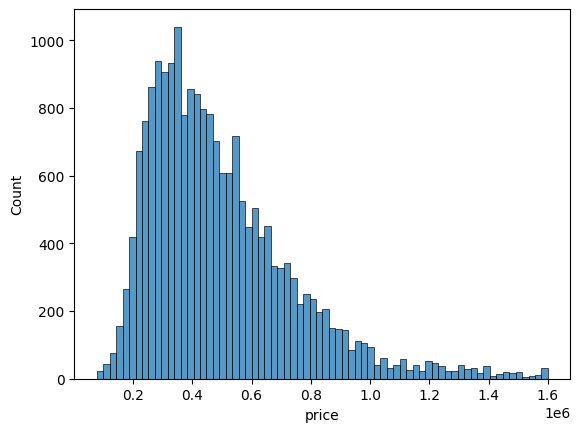

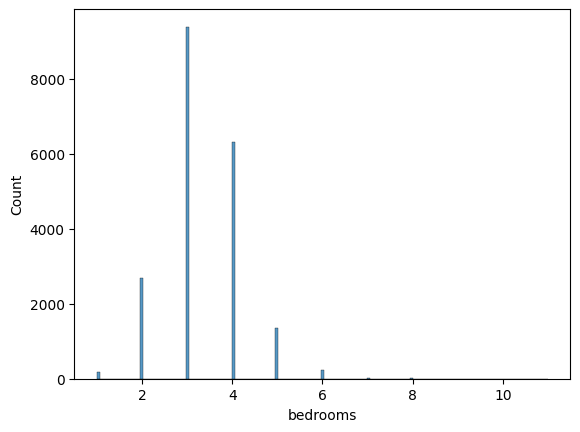

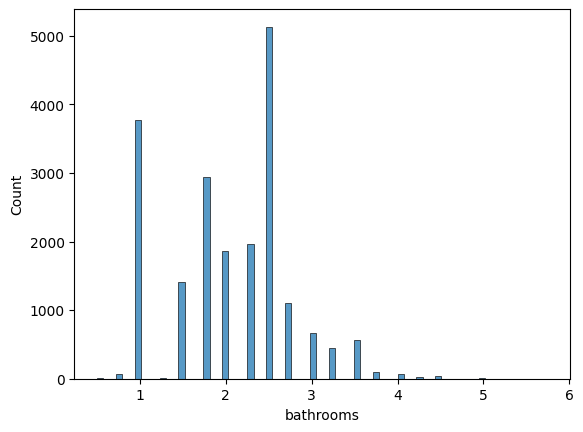

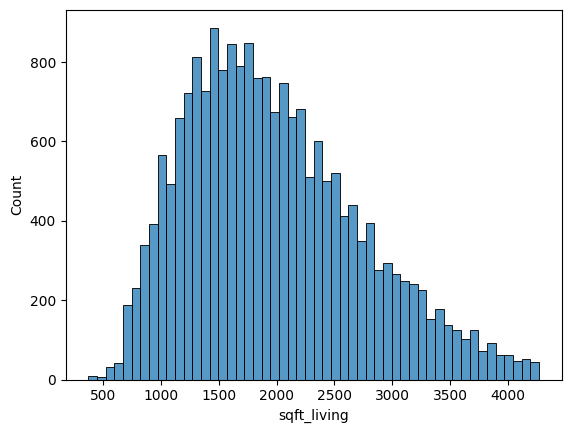

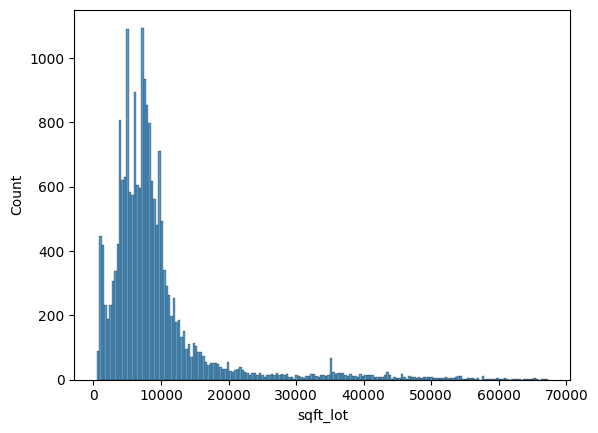

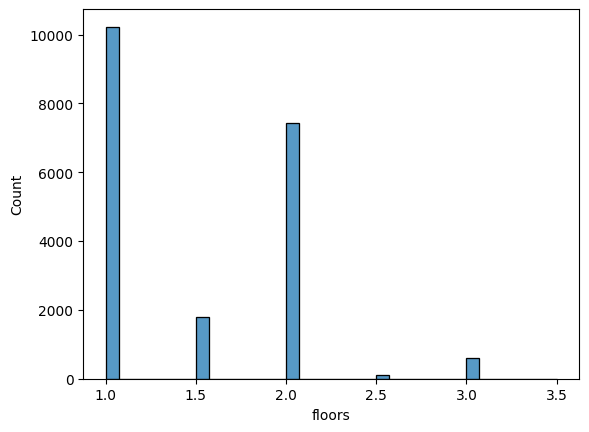

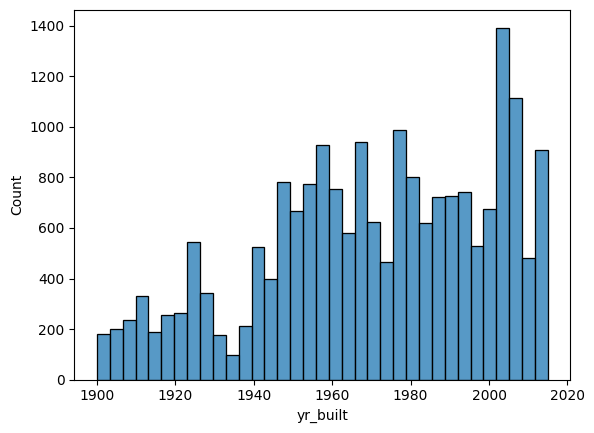

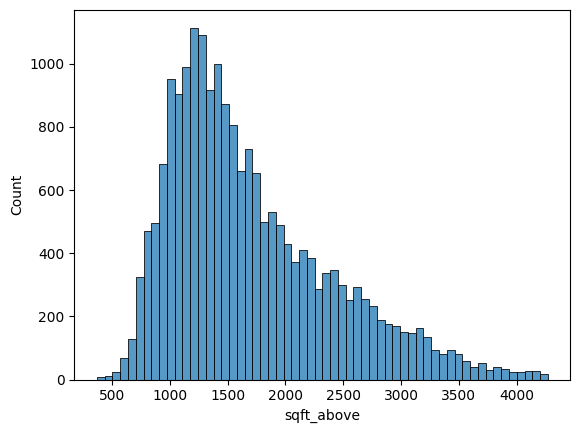

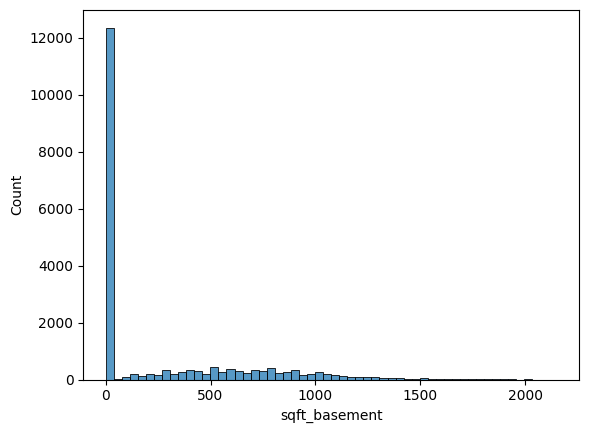

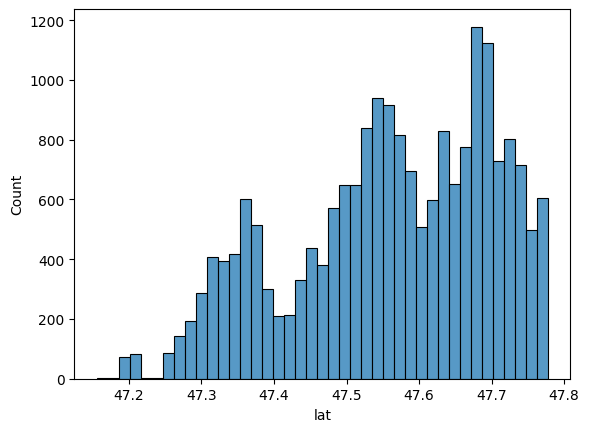

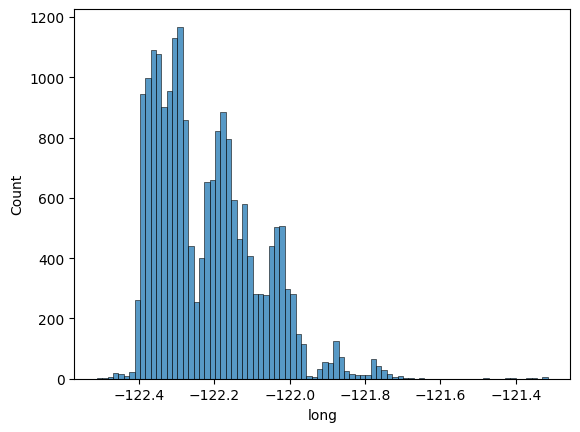

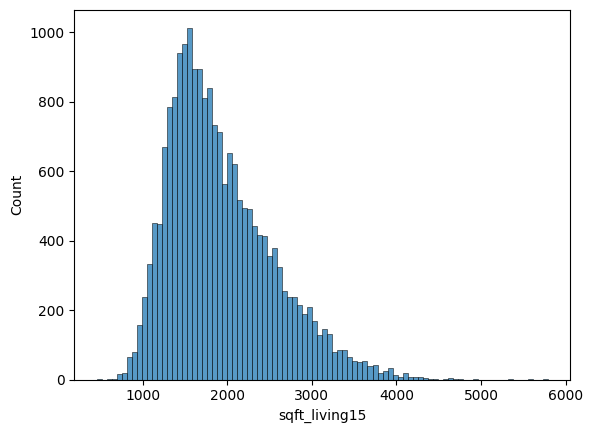

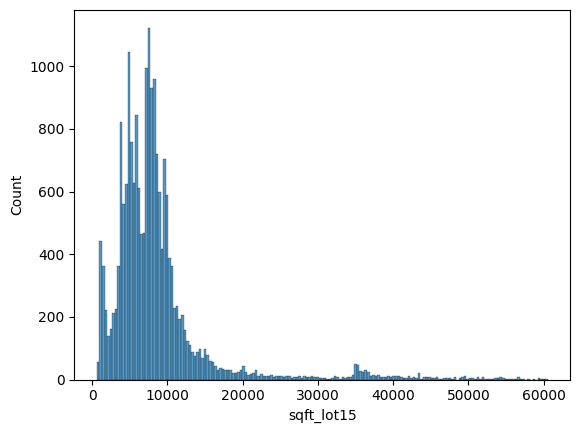

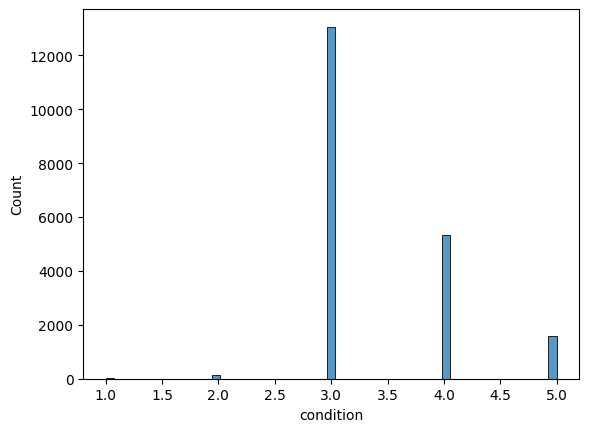

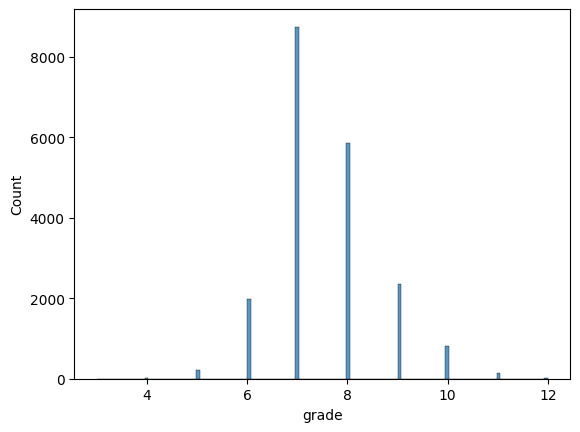

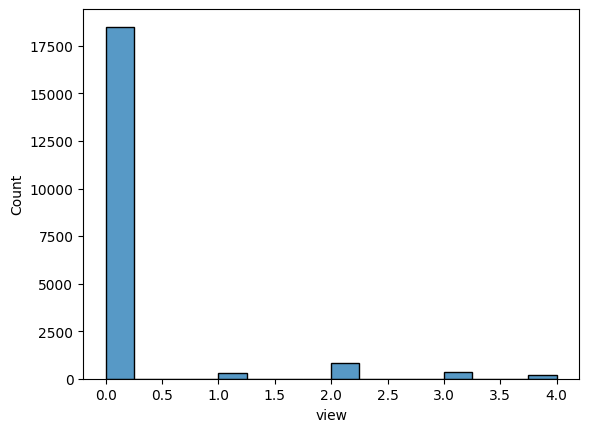

In [110]:
for col in numeric_columns:
    sns.histplot(data=df, x=col)
    plt.show()

In [111]:
for col in categoric_columns:
    print(col, ': ',  len(df[col].unique()))

date :  372
waterfront :  2
yr_renovated :  69
zipcode :  70


In [112]:
numeric_columns.append('sold_year')
categoric_columns.append('sold_month')
categoric_columns.remove( 'date')

df['sold_year'] = df['date'].dt.year
df['sold_month'] = df['date'].dt.month
df[categoric_columns].head()

,waterfront,yr_renovated,zipcode,sold_month
0,0,0,98178,10
1,0,1991,98125,12
2,0,0,98028,2
3,0,0,98136,12
4,0,0,98074,2


In [113]:
from datetime import datetime
numeric_columns.append('time_from_renovation')
categoric_columns.append('renovated')
categoric_columns.remove('yr_renovated')

def calculate_time(data):
    if data['yr_renovated'] == 0:
        years = datetime.now().date().year - data['yr_built']
    else: 
        years = datetime.now().date().year - data['yr_renovated']

    return years

df['renovated'] = df['yr_renovated'].apply(lambda x: 0 if x ==0 else 1)
df['time_from_renovation'] = df.apply(calculate_time, axis=1)

df.drop(columns=['date', 'yr_renovated'], inplace=True)

for col in categoric_columns:
    print(col, ': ',  len(df[col].unique()))

waterfront :  2
zipcode :  70
sold_month :  12
renovated :  2


<Axes: xlabel='long', ylabel='lat'>

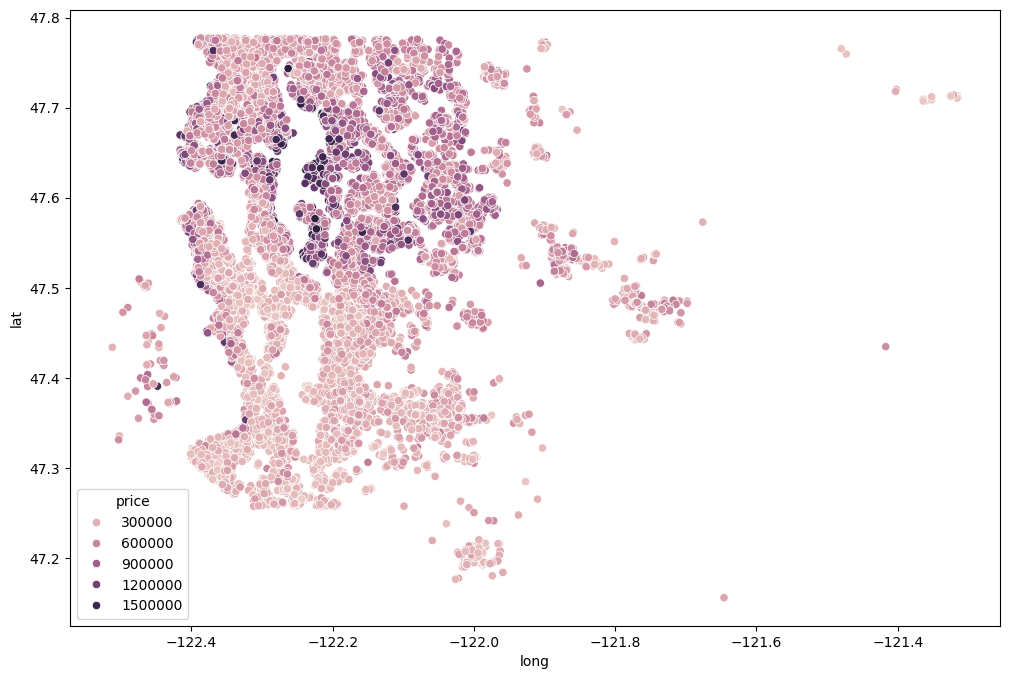

In [114]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

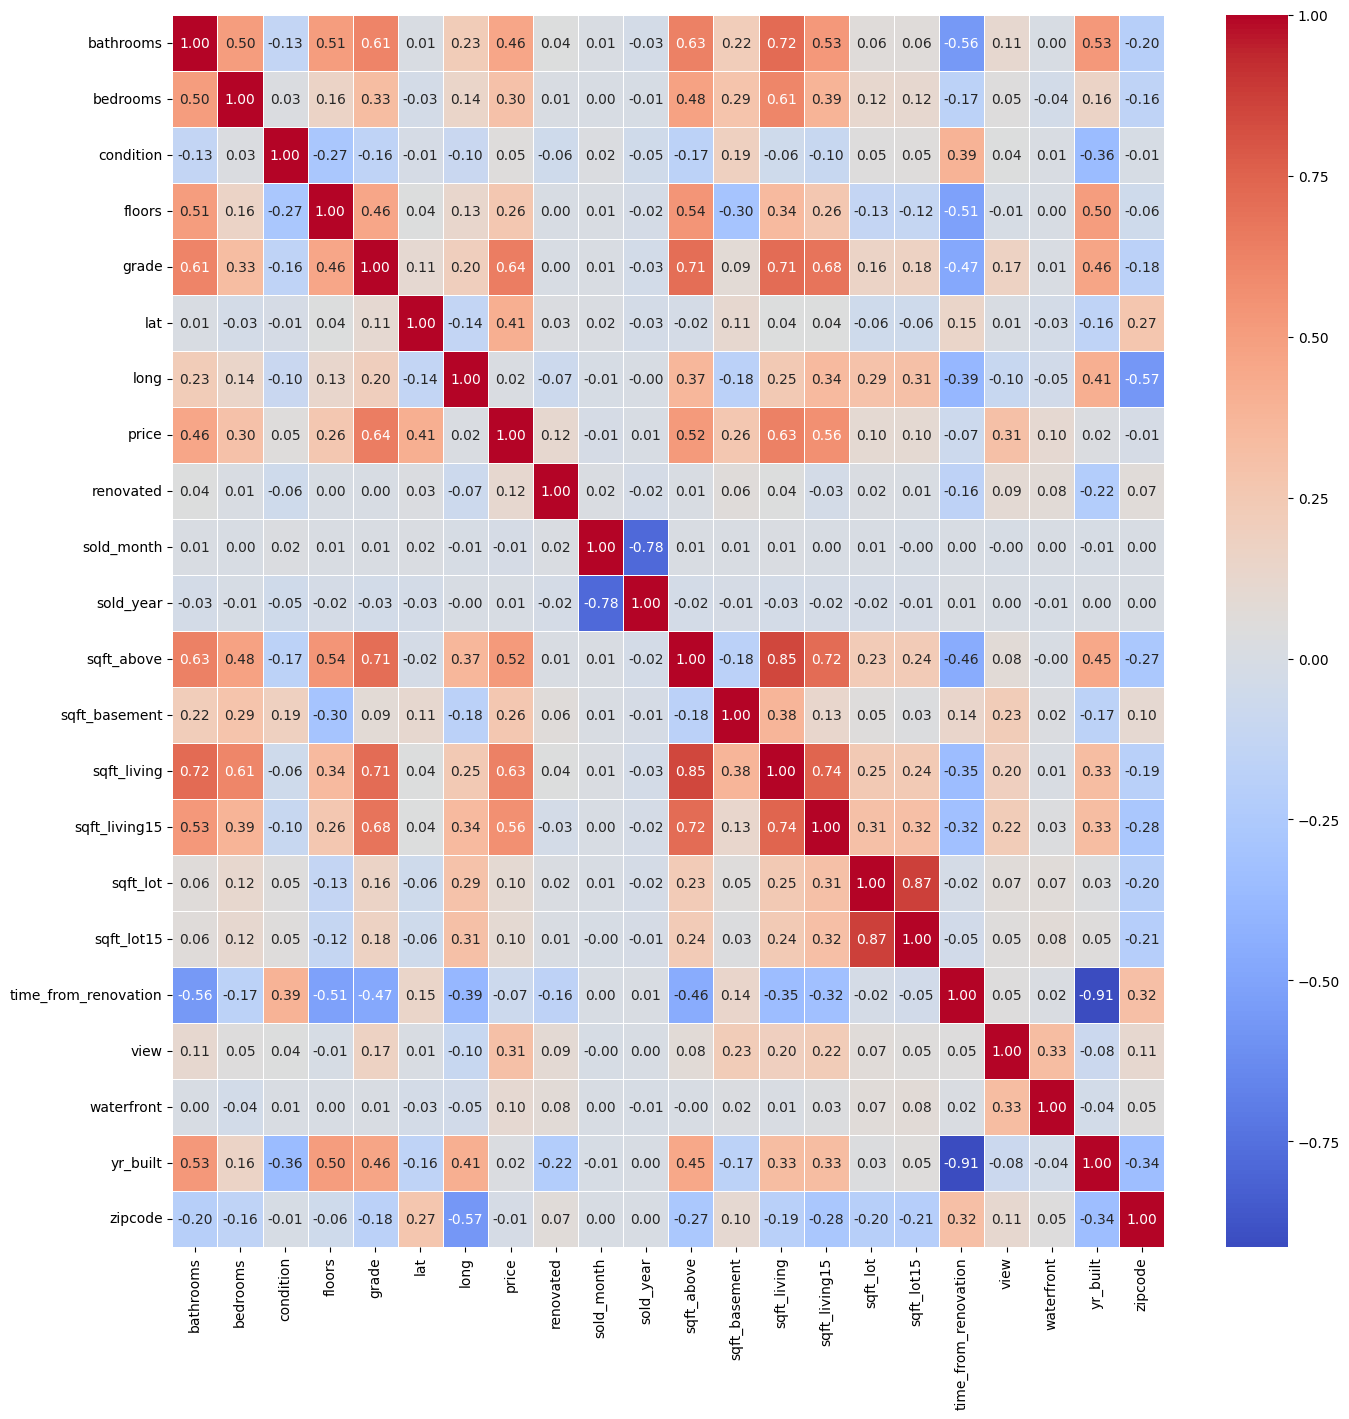

In [115]:
df = df[sorted(list(df.columns))]
correlation_matrix = df.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [116]:
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (abs(correlation_matrix.iloc[i, j]) > 0.9) and ('price' not in [correlation_matrix.columns[i], correlation_matrix.columns[j]]):
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

for pair in high_correlation_pairs:
    print("Columns:", pair[0], "and", pair[1])
    print("Correlation with 'price' for", pair[0], ":", correlation_matrix.loc[pair[0], 'price'])
    print("Correlation with 'price' for", pair[1], ":", correlation_matrix.loc[pair[1], 'price'], '\n')

Columns: yr_built and time_from_renovation
Correlation with 'price' for yr_built : 0.023865328310437903
Correlation with 'price' for time_from_renovation : -0.07490036493466085 



In [117]:
columns_to_delete = correlation_matrix[(abs(correlation_matrix['price']) < 0.05)].index
print(columns_to_delete)
df.drop(columns = columns_to_delete, inplace = True)

Index(['long', 'sold_month', 'sold_year', 'yr_built', 'zipcode'], dtype='object')


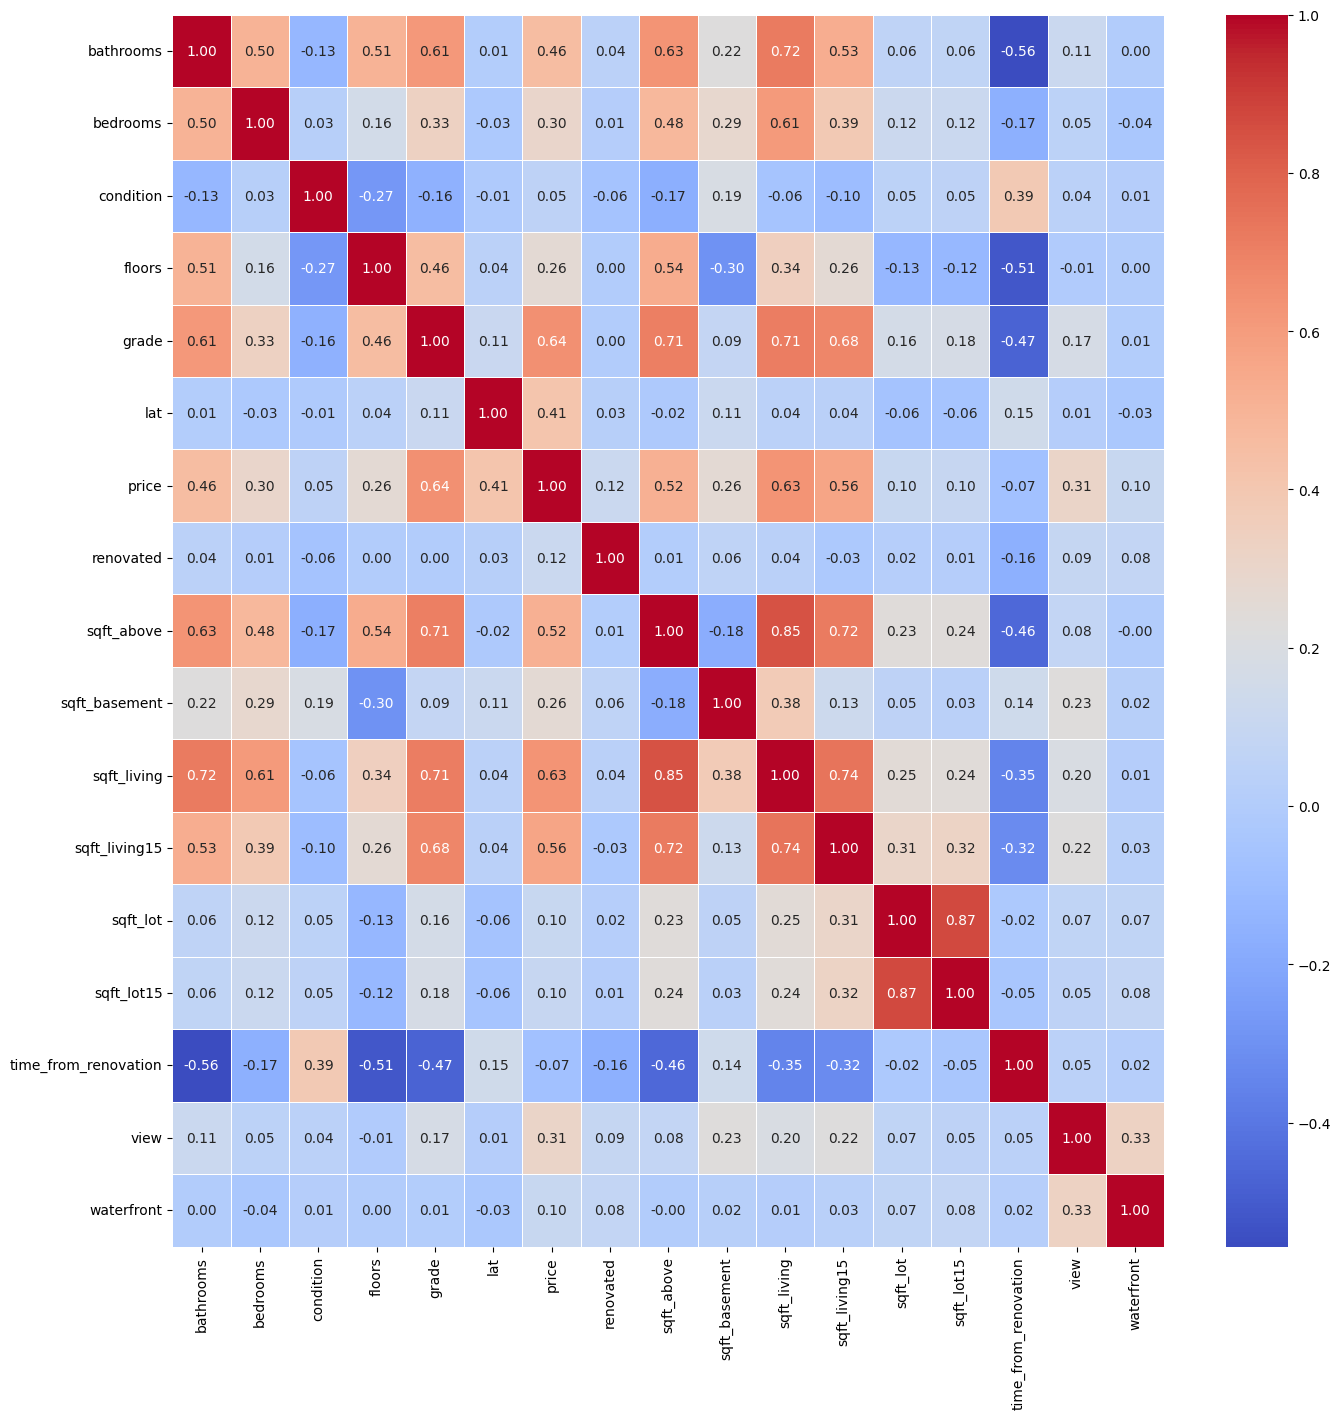

In [118]:
correlation_matrix = df.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

Scaling

In [119]:
X = df.drop('price',axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
print('Train:', X_train.shape)
print('Test:', X_test.shape)

Train: (14122, 16)
Test: (6053, 16)


In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [163]:
model = Sequential()

model.add(Dense(60,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=150)

Epoch 1/150


111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 303254765568.0000 - val_loss: 306951389184.0000
Epoch 2/150
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 273841160192.0000 - val_loss: 36329992192.0000
Epoch 3/150
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34660368384.0000 - val_loss: 33788405760.0000
Epoch 4/150
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33554151424.0000 - val_loss: 32306683904.0000
Epoch 5/150
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31994925056.0000 - val_loss: 31053725696.0000
Epoch 6/150
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30807857152.0000 - val_loss: 29894926336.0000
Epoch 7/150
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29456822272.0000 - val_loss: 28925206528.0000
Epoch 8/150
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29271926784.0000 - val_loss: 27899887616.0000
Epoch 9/150
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28001423360.0000 - val_loss: 26993575936.0000
Epoch 10/150
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1

<Axes: >

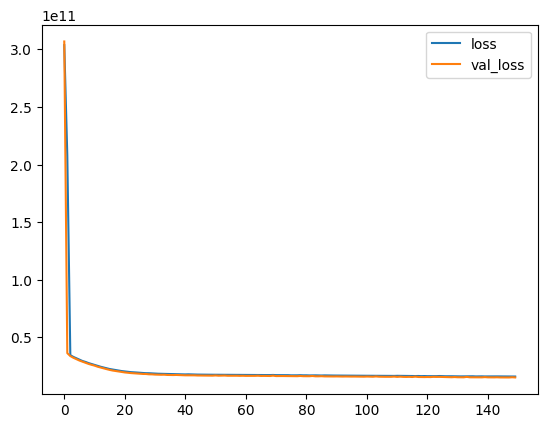

In [164]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [165]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score,r2_score
y_pred = model.predict(X_test)
mean_absolute_error(y_test,y_pred)

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step


87524.8883450097

In [166]:
r2_score(y_test, y_pred, force_finite=False)

0.7534351832275905

In [167]:
np.sqrt(mean_squared_error(y_test,y_pred))

123724.64334092948

In [168]:
explained_variance_score(y_test,y_pred)

0.7543254362396553

In [169]:
np.sqrt(mean_squared_error(y_test,y_pred))/df['price'].mean()

0.2498915466376926

In [170]:
df['price'].mean()

495113.3601982652

In [171]:
df['price'].median()

440000.0

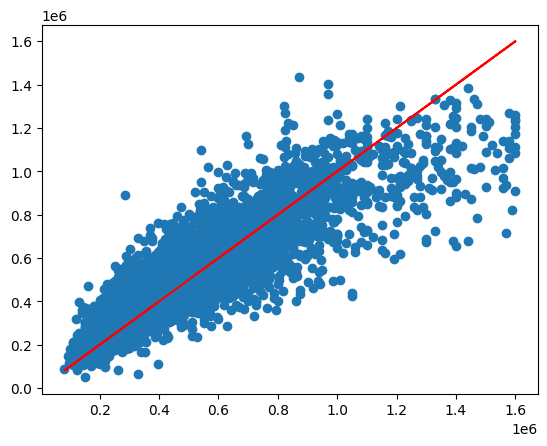

In [172]:
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [173]:
errors = y_test.values.reshape(X_test.shape[0], 1) - y_pred

/var/folders/h4/pdn3pcp16vxc0wjz5jwhfhm40000gn/T/ipykernel_61627/2392254718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: ylabel='Density'>

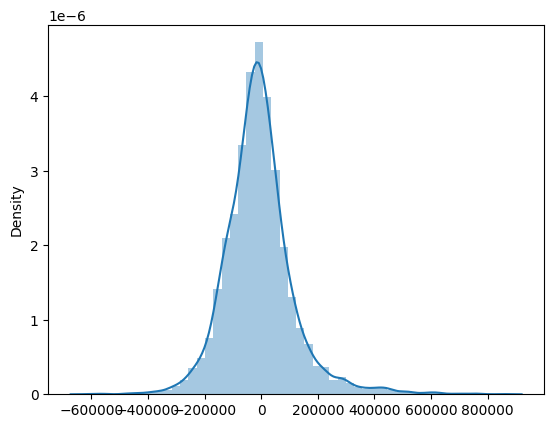

In [174]:
sns.distplot(errors)